## 1. Problem Scope

### Problem:
The hospital wants to predict whether a patient will be readmitted within 30 days of discharge using patient data.

### Objective:
Develop an AI-based predictive model to identify high-risk patients, enabling proactive care and reducing hospital readmission rates.

### Stakeholders:
- **Hospital Administrators**: Reduce costs and penalties associated with high readmission.
- **Medical Staff**: Identify patients requiring additional post-discharge care.
- **Data Scientists/AI Team**: Build, validate, and monitor the predictive model.
- **IT Department**: Integrate the model into the existing hospital systems.
- **Patients**: Receive better care through targeted follow-up.


## 2. Data Strategy

### Data Sources:
- **Electronic Health Records (EHRs)**: Includes clinical notes, discharge summaries, lab results.
- **Demographic Data**: Age, gender, race/ethnicity.
- **Medical History**: Past admissions, diagnoses, and medication use.
- **Vitals and Lab Results**: Blood pressure, cholesterol levels, etc.

### Ethical Concerns:
1. **Patient Privacy**: All data must be anonymized or de-identified in compliance with HIPAA.
2. **Algorithmic Bias**: Care must be taken to ensure the model performs fairly across different demographic groups (e.g., race, gender).

### Preprocessing Pipeline:
Steps:
- Handle missing values
- One-hot encode categorical variables
- Normalize numerical features


In [32]:
# ------------------------------
# Preprocessing Pipeline
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def preprocess_data(df):
    # Impute missing values for numerical columns
    for col in ['age', 'blood_pressure', 'cholesterol']:
        df[col] = df[col].fillna(df[col].median())
    # One-hot encode categorical variables
    df = pd.get_dummies(df, columns=['gender', 'race'])
    # Normalize numerical features
    scaler = StandardScaler()
    df[['age', 'blood_pressure', 'cholesterol']] = scaler.fit_transform(df[['age', 'blood_pressure', 'cholesterol']])
    return df

## 3. Model Development

### Model Selection:
- **Model Used**: Random Forest Classifier
- **Why?**
  - Works well with mixed-type data
  - Handles nonlinear relationships
  - Low risk of overfitting when properly tuned

We’ll now simulate a dataset and walk through model training and evaluation.

In [33]:
# ------------------------------
# Create Hypothetical Dataset
# ------------------------------
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.randint(20, 80, 100),
    'gender': np.random.choice(['Male', 'Female'], 100),
    'race': np.random.choice(['White', 'Black', 'Asian'], 100),
    'blood_pressure': np.random.randint(90, 180, 100),
    'cholesterol': np.random.randint(150, 300, 100),
    'readmitted': np.random.choice([0, 1], 100)
})

In [34]:
# ------------------------------
# Preprocess and Split
# ------------------------------
from sklearn.model_selection import train_test_split

data = preprocess_data(data)
X = data.drop('readmitted', axis=1)
y = data['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
# ------------------------------
# Train Model
# ------------------------------
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### 📊 Confusion Matrix Visualization

Below, we evaluate the model’s performance using standard classification metrics and visualize the confusion matrix in two ways:

- **Sklearn’s ConfusionMatrixDisplay**: A built-in, clean visualization.
- **Seaborn Heatmap**: More customizable and visually appealing for presentations or reports.

These visualizations help quickly understand:
- True Positives (TP)
- True Negatives (TN)
- False Positives (FP)
- False Negatives (FN)

They are especially helpful when communicating model effectiveness to clinical or administrative teams.


Confusion Matrix:
 [[6 3]
 [6 5]]
Precision: 0.625
Recall: 0.45454545454545453
F1 Score: 0.5263157894736842
ROC-AUC: 0.5606060606060607


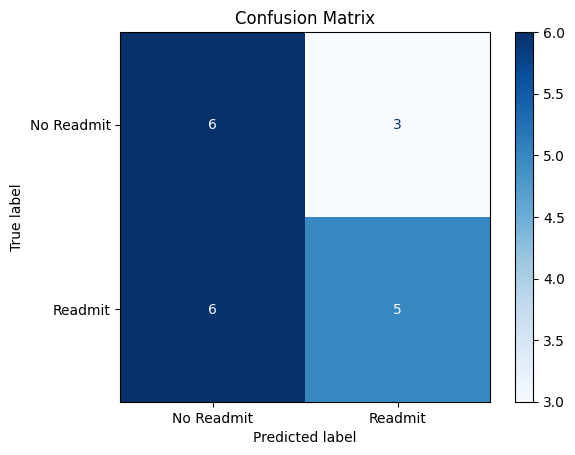

In [36]:
# ------------------------------
# Evaluate Model
# ------------------------------
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

# ------------------------------
# Visualize Confusion Matrix
# ------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn's built-in display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Readmit', 'Readmit'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# with seaborn
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Readmit', 'Readmit'], yticklabels=['No Readmit', 'Readmit'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix Heatmap')
# plt.show()


## 4. Deployment

## Integration Steps:
1. **Model Packaging**: Save the trained model using joblib or pickle.
2. **API Deployment**: Create a REST API using Flask or FastAPI.
3. **EHR Integration**: Connect API to hospital's electronic health record (EHR) platform.
4. **Interface Design**: Build an interface for doctors to view readmission risk.
5. **Monitoring**: Log predictions and retrain periodically.

### Regulatory Compliance:
- **Data Encryption**: Use HTTPS, encrypt databases.
- **Access Control**: Role-based permissions (doctor, nurse, IT).
- **Audit Logs**: Log every access to model and prediction requests.
- **HIPAA Compliance**: Ensure ongoing internal audits and policy enforcement.


In [37]:
# Example of model prediction API (Commented Out)
# from flask import Flask, request, jsonify
# app = Flask(__name__)
# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.get_json()
#     df = pd.DataFrame([data])
#     df = preprocess_data(df)
#     prediction = int(model.predict(df)[0])
#     return jsonify({'readmission_risk': prediction})

## 5. Optimization

### Strategy to Reduce Overfitting:
- **K-Fold Cross-Validation**: Evaluate model performance across multiple subsets of the data.
- **Regularization**: Limit depth of decision trees (`max_depth`) or number of trees in the forest (`n_estimators`).

Let’s test cross-validation.

In [38]:
# ------------------------------
# 5. Optimization (Overfitting)
# ------------------------------
# Method: Cross-validation and model regularization
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV Score:", np.mean(cv_scores))

Cross-validation scores: [0.55 0.4  0.5  0.5  0.5 ]
Average CV Score: 0.49000000000000005
